# Steps:

# Importing Libraries

In [88]:
# importing libraries

import pandas as pd
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid',palette = 'muted',color_codes = True)
os.chdir(r'D:\Machine Learning and Big Data\Dataset\CCPP')

# Understanding the data

In [89]:
# importing dataset and first three observations
df = pd.read_excel('Folds5x2_pp.xlsx', index_col=None)
df.head(3)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56


In [90]:
# the last three observations
df.tail(3)

,AT,V,AP,RH,PE
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74
9567,21.60,62.52,1017.23,67.87,453.28


In [91]:
# analysing with data profiling using sweetviz

import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [92]:
#Dimension or shape of the dataset

df.shape

(9568, 5)

In [93]:
#column or features name

df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [94]:
# renaming the feature names >>

df.rename(columns = {"AT" : "Temperature", 
                     "V" : "Exhaust_Vacuum", 
                     "AP" : "Ambient_Pressure",
                    "RH" : "Relative_Humidity",
                    "PE" : "Produced_Energy"},inplace= True)

In [95]:
df.columns

Index(['Temperature', 'Exhaust_Vacuum', 'Ambient_Pressure',
       'Relative_Humidity', 'Produced_Energy'],
      dtype='object')

In [96]:
# Number of  unique values for each of the features

df.nunique()

Temperature          2773
Exhaust_Vacuum        634
Ambient_Pressure     2517
Relative_Humidity    4546
Produced_Energy      4836
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Temperature        9568 non-null   float64
 1   Exhaust_Vacuum     9568 non-null   float64
 2   Ambient_Pressure   9568 non-null   float64
 3   Relative_Humidity  9568 non-null   float64
 4   Produced_Energy    9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [98]:
#five number summary
df.describe()

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Produced_Energy
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [99]:
df.isna().sum()

Temperature          0
Exhaust_Vacuum       0
Ambient_Pressure     0
Relative_Humidity    0
Produced_Energy      0
dtype: int64

# Cleaning the data

In [100]:
# checking the duplicate values 

df.duplicated().sum()
print(df.duplicated().sum())

41


In [101]:
#viewing the duplicate rows or observations 

df.loc[df.duplicated(keep = 'first'),:].head()

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Produced_Energy
2184,9.54,41.17,1019.79,65.61,481.18
2421,12.11,41.17,1019.46,62.59,475.53
2577,28.84,75.60,1018.41,53.96,442.69
2896,27.54,75.60,1018.26,57.89,440.87
3314,8.07,41.17,1019.40,86.43,484.54


In [102]:
# drop or remove the duplicate values 

df.drop_duplicates(keep = 'first',inplace = True)
df.shape

(9527, 5)

In [103]:
#check the missing/null values 

df.isna().sum()

Temperature          0
Exhaust_Vacuum       0
Ambient_Pressure     0
Relative_Humidity    0
Produced_Energy      0
dtype: int64

# Visualization >> 

<AxesSubplot:xlabel='Produced_Energy', ylabel='Count'>

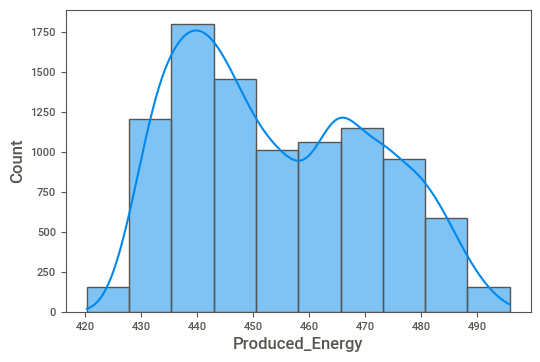

In [113]:
sns.histplot(data=df, x="Produced_Energy",bins=10,kde=True)

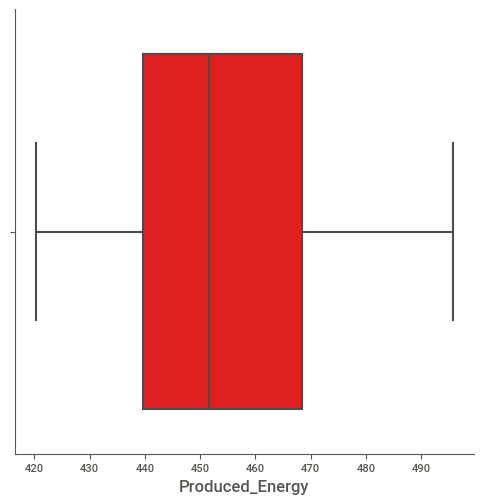

In [115]:
sns.catplot(x = 'Produced_Energy',kind = 'box',data= df,color = 'red')

# Drawing HeatMap >> 

<AxesSubplot:>

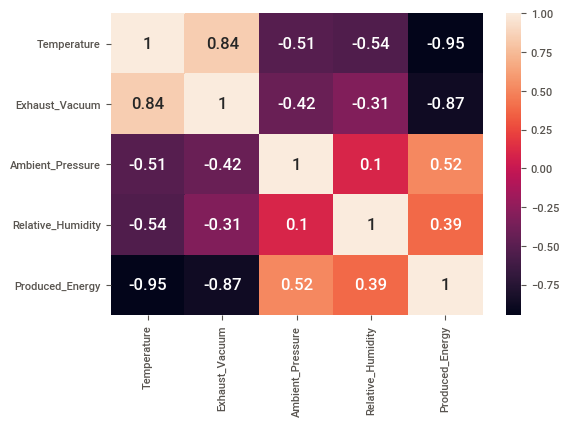

In [114]:
sns.heatmap(df.corr(), annot = True)

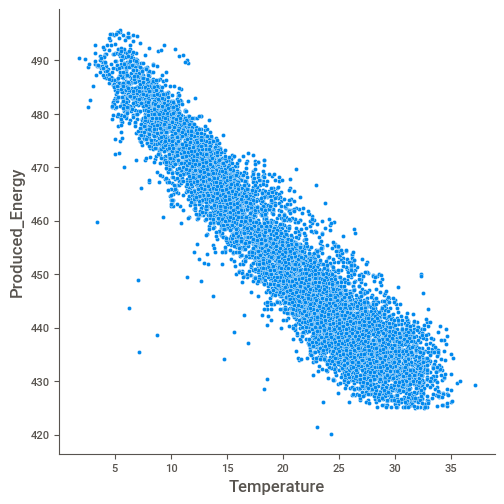

In [116]:
sns.relplot(data=df, x="Temperature", y="Produced_Energy")

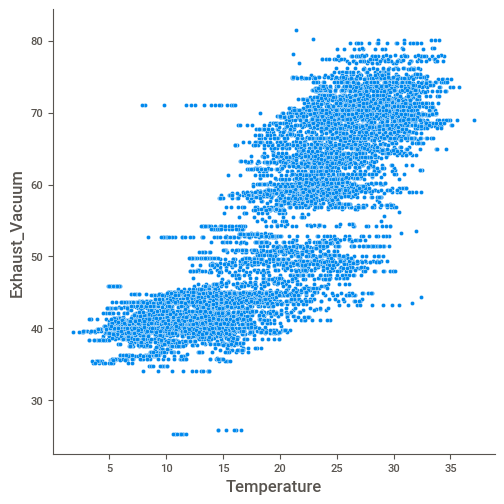

In [117]:
sns.relplot(data=df, x="Temperature", y="Exhaust_Vacuum")

# Feature Engineering 

In [118]:
#Standardize the dataset >> 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.model_selection import train_test_split

In [119]:
X = df.drop(['Produced_Energy',],axis = 1)
X.sample(3)

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity
3119,27.65,48.41,1008.54,58.25
7803,23.07,65.27,1013.24,58.38
8142,24.22,71.14,1009.38,64.53


In [120]:
y = df["Produced_Energy"]
y.sample(3)

5514    457.01
8816    449.60
5355    443.89
Name: Produced_Energy, dtype: float64

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state= 5)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print('The shape of X_train: ',X_train.shape,"\n"
      'The shape of X_test: ',X_test.shape, "\n"
      'The shape of y_train: ',y_train.shape, "\n"
      'The shape of y_test: ',y_test.shape)

The shape of X_train:  (6668, 4) 
The shape of X_test:  (2859, 4) 
The shape of y_train:  (6668,) 
The shape of y_test:  (2859,)


# Modeling >>

In [122]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
fitting = reg.fit(X_train,y_train)

In [123]:
reg.coef_

array([-14.80561242,  -2.8945605 ,   0.32586924,  -2.33151945])

In [124]:
score = reg.score(X_test,y_test)
percentage = score * 100
print('The accuracy of the Linear Regression model is: ',percentage.round(2))

The accuracy of the Linear Regression model is:  93.06


# K-fold cross validation 

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state=0)
cv = cross_val_score(LinearRegression(),X,y,cv=4).mean().round(3)
print ("the cross validation score for Linear Regression : ",cv)

the cross validation score for Linear Regression :  0.928


# KNN

In [126]:
from sklearn import datasets, neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=5, leaf_size=30, p=2)

In [127]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [128]:
score = knn.score(X_test,y_test)
percentage = score * 100
print('The accuracy of the KNN model is: ',percentage.round(2))

The accuracy of the KNN model is:  95.02


# K-fold cross validation: KNN

In [129]:
cv = cross_val_score(knn,X,y,cv=4).mean().round(3)
print ("the cross validation score for KNN: ",cv)

the cross validation score for KNN:  0.945


# Random Forest

In [131]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators = 1000, random_state = 35)

In [132]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=35)

In [133]:
score = rf.score(X_test,y_test)
percentage = score * 100
print('The accuracy of the Random Forest model is: ',percentage.round(2))

The accuracy of the Random Forest model is:  96.16


# K-fold cross validation:Random Forest

In [134]:
cv = cross_val_score(rf,X,y,cv=4).mean().round(3)
print ("the cross validation score for Random Forest: ",cv)

the cross validation score for Random Forest:  0.961


# ADABoost

In [135]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_classification

abR = AdaBoostRegressor(n_estimators=50,learning_rate=1,random_state = 123)

In [136]:
abR.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=1, random_state=123)

In [137]:
score = abR.score(X_test,y_test)
percentage = score * 100
print('The accuracy of the ADABoost model is: ',percentage.round(2))

The accuracy of the ADABoost model is:  90.06


# K-fold cross validation: ADABoost

In [138]:
cv = cross_val_score(abR,X,y,cv=4).mean().round(3)
print ("the cross validation score for ADABoost: ",cv)

the cross validation score for ADABoost:  0.893


# SVR

In [139]:
from sklearn.svm import SVR
regressor = SVR(C= 0.01, kernel='linear', degree=3,tol=0.01,gamma = 0.01)
print(regressor)

SVR(C=0.01, gamma=0.01, kernel='linear', tol=0.01)


In [140]:
regressor.fit(X_train,y_train)

SVR(C=0.01, gamma=0.01, kernel='linear', tol=0.01)

In [141]:
score = regressor.score(X_test,y_test)
percentage = score * 100
print('The accuracy of the SVR model is: ',percentage.round(2))

The accuracy of the SVR model is:  92.15


# K-fold cross validation: SVR

In [142]:
cv = cross_val_score(regressor,X,y,cv=4).mean().round(3)
print ("the cross validation score for SVR: ",cv)

the cross validation score for SVR:  0.928


# R^2 Adj R^2 and P-values


In [143]:
import statsmodels.api as sm
X = sm.add_constant(X) 
model =sm.OLS(y,X).fit(random_state = 123)
predictions = model.predict(X)
print_model = model.summary()
print(print_model)
predictions.head(5)

                            OLS Regression Results                            
Dep. Variable:        Produced_Energy   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 3.088e+04
Date:                Fri, 03 Dec 2021   Prob (F-statistic):               0.00
Time:                        01:12:01   Log-Likelihood:                -27970.
No. Observations:                9527   AIC:                         5.595e+04
Df Residuals:                    9522   BIC:                         5.599e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               456.1291      9.76

5506    455.151216
1547    476.952007
6152    472.231614
7011    482.572157
520     441.054951
dtype: float64

In [144]:
#displaying the p-values
model.pvalues

const                 0.000000e+00
Temperature           0.000000e+00
Exhaust_Vacuum       1.782773e-217
Ambient_Pressure      1.727755e-10
Relative_Humidity    6.216381e-289
dtype: float64

# RMSE (Root Mean Square Error)

In [145]:
from sklearn.metrics import  mean_squared_error
print('RMSE:'+str(np.sqrt(mean_squared_error(predictions,y)).round(5)))

RMSE:4.55839


# Correlation Matrix 

In [146]:
df.corr()

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Produced_Energy
Temperature,1.000000,0.843689,-0.508222,-0.543947,-0.947908
Exhaust_Vacuum,0.843689,1.000000,-0.415718,-0.312214,-0.869900
Ambient_Pressure,-0.508222,-0.415718,1.000000,0.101631,0.518687
Relative_Humidity,-0.543947,-0.312214,0.101631,1.000000,0.391175
Produced_Energy,-0.947908,-0.869900,0.518687,0.391175,1.000000
